In [ ]:
!pip install pandas matplotlib glob os

ERROR: Invalid requirement: 'pandas,'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [3]:
# Path to CSV files
path = "../datas/Data Coaching Fitbit/"
files = glob.glob(os.path.join(path, "*.csv"))

In [4]:
# Load all CSV files into a dictionary
data = {}
for file in files:
    person_id = os.path.basename(file).split(".")[0]  # Extract person ID from filename
    df = pd.read_csv(file, parse_dates=["date"])
    data[person_id] = df

In [5]:
# Function to plot data for a single person
def plot_person_data(person_id, df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Activity Data for Person {person_id}')

    # Steps over time
    axes[0, 0].plot(df['date'], df['steps'], marker='o', linestyle='-', label='Steps')
    axes[0, 0].set_title('Steps Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Steps')
    axes[0, 0].legend()

    # Calories over time
    axes[0, 1].plot(df['date'], df['calories'], marker='o', linestyle='-', color='r', label='Calories')
    axes[0, 1].set_title('Calories Burned Over Time')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Calories')
    axes[0, 1].legend()

    # Distance over time
    axes[1, 0].plot(df['date'], df['distance'], marker='o', linestyle='-', color='g', label='Distance')
    axes[1, 0].set_title('Distance Over Time')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Distance (km)')
    axes[1, 0].legend()

    # METs over time
    axes[1, 1].plot(df['date'], df['mets'], marker='o', linestyle='-', color='purple', label='METs')
    axes[1, 1].set_title('METs Over Time')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('METs')
    axes[1, 1].legend()

    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

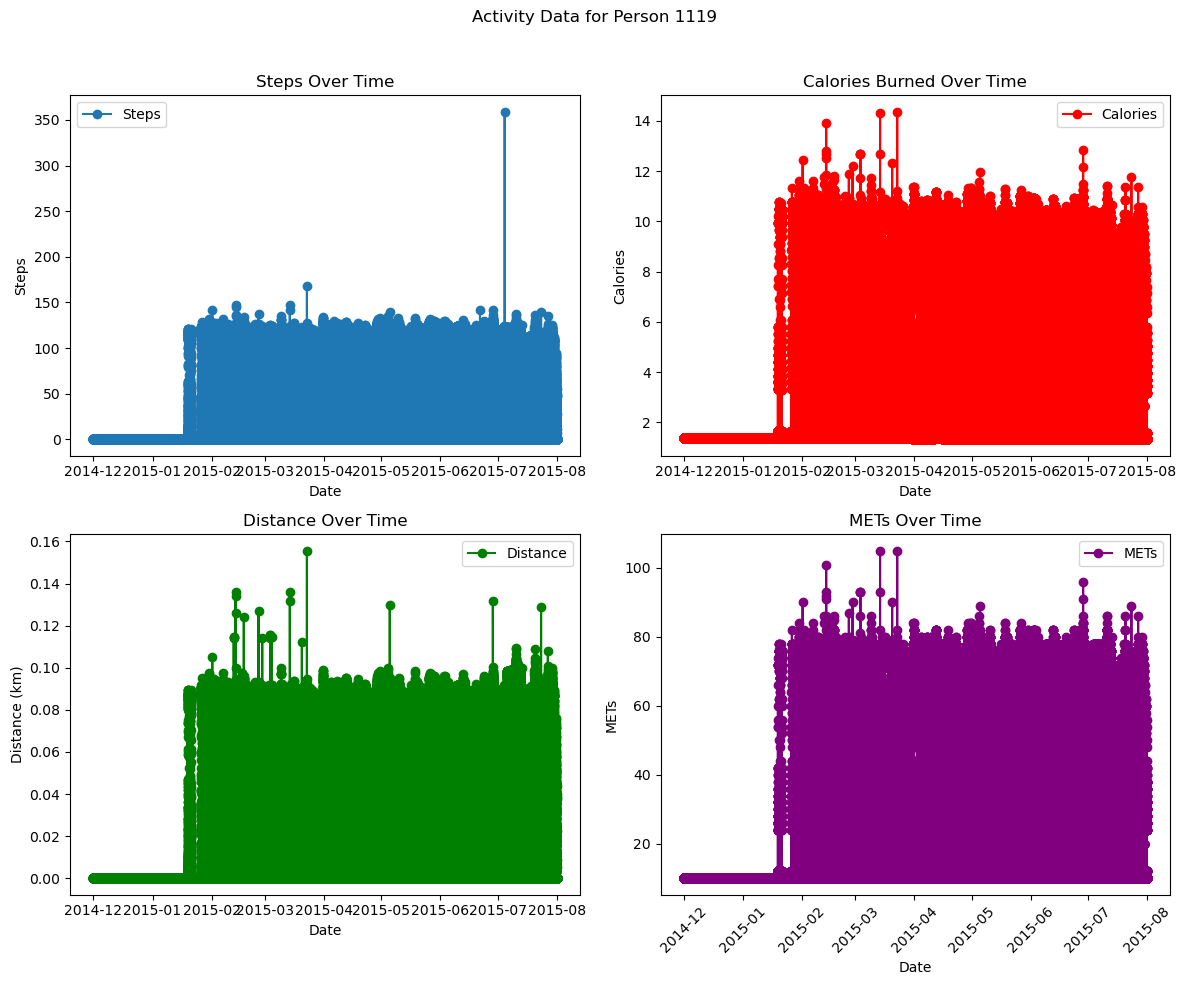

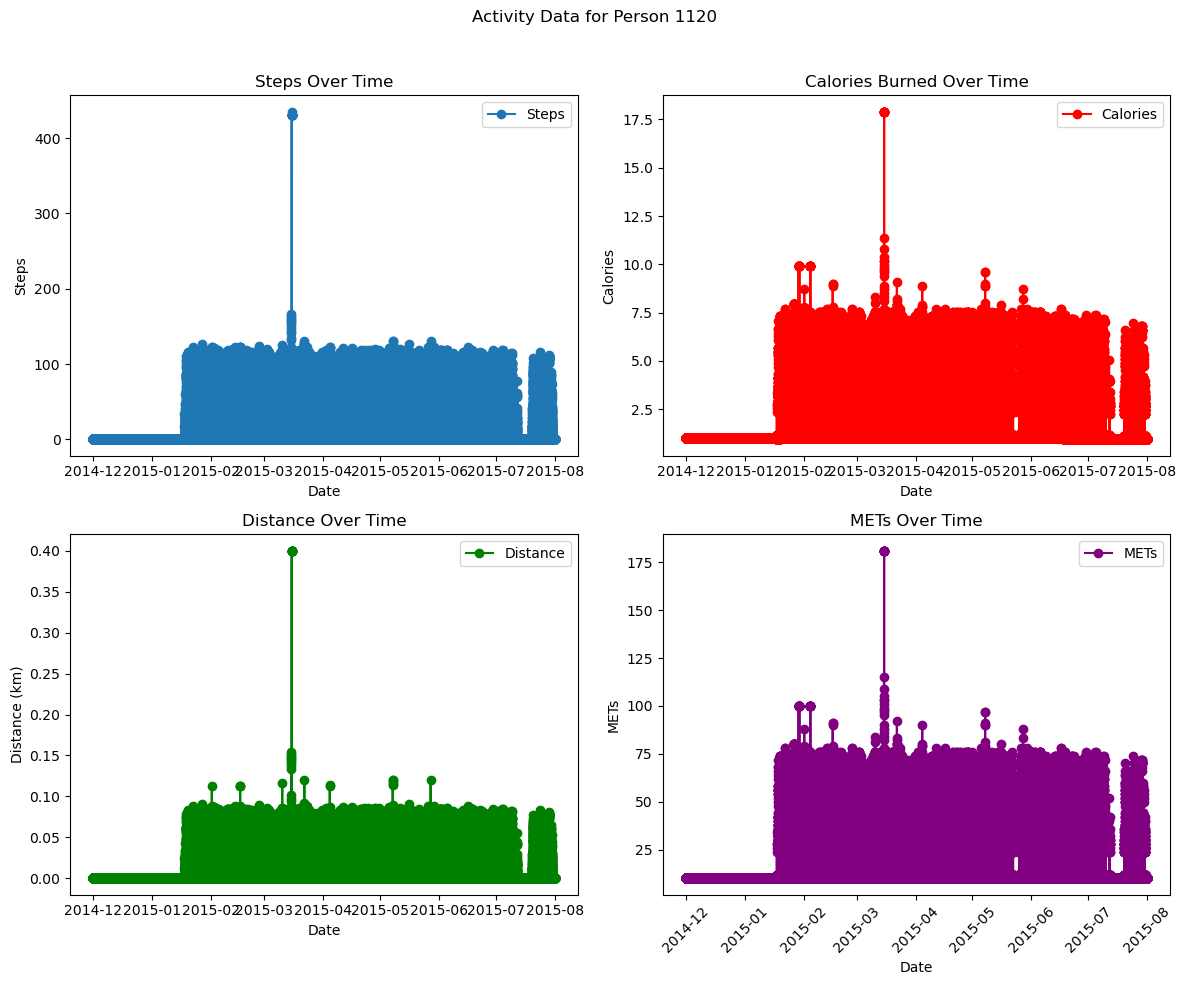

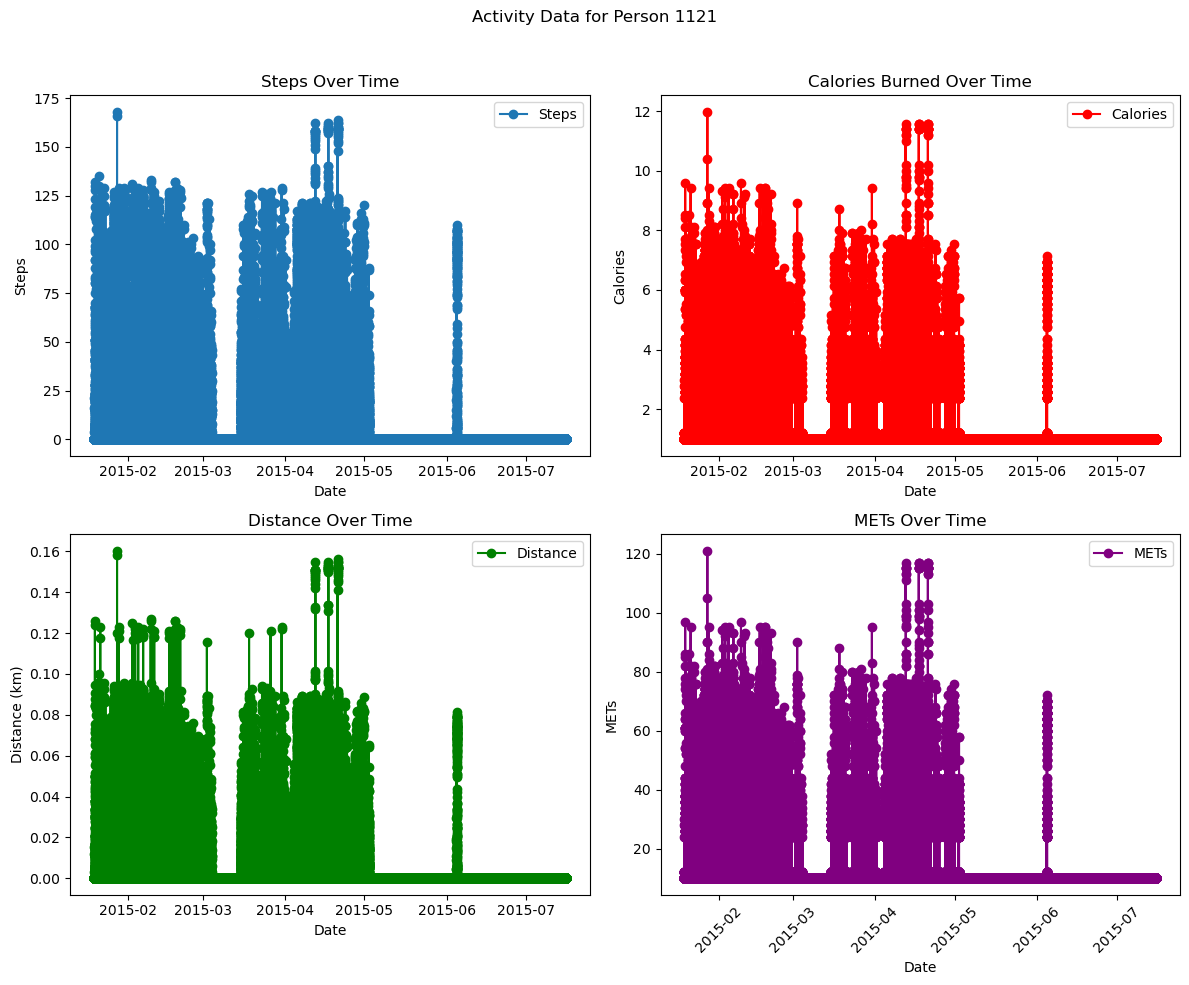

In [ ]:
# Plot for each person
for person_id, df in data.items():
    plot_person_data(person_id, df)

In [ ]:
# Aggregated Data Analysis
def plot_group_comparison(data):
    aggregated_data = []

    for person_id, df in data.items():
        avg_steps = df['steps'].mean()
        avg_calories = df['calories'].mean()
        avg_distance = df['distance'].mean()
        avg_mets = df['mets'].mean()
        aggregated_data.append([person_id, avg_steps, avg_calories, avg_distance, avg_mets])

    df_summary = pd.DataFrame(aggregated_data, columns=['Person', 'Avg Steps', 'Avg Calories', 'Avg Distance', 'Avg METs'])
    df_summary.set_index('Person', inplace=True)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Comparison of Activity Metrics Across Individuals')

    df_summary['Avg Steps'].plot(kind='bar', ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Average Steps')
    axes[0, 0].set_ylabel('Steps')

    df_summary['Avg Calories'].plot(kind='bar', ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Average Calories')
    axes[0, 1].set_ylabel('Calories')

    df_summary['Avg Distance'].plot(kind='bar', ax=axes[1, 0], color='green')
    axes[1, 0].set_title('Average Distance')
    axes[1, 0].set_ylabel('Distance (km)')

    df_summary['Avg METs'].plot(kind='bar', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Average METs')
    axes[1, 1].set_ylabel('METs')

    for ax in axes.flat:
        ax.set_xlabel('Person ID')
        ax.set_xticklabels(df_summary.index, rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

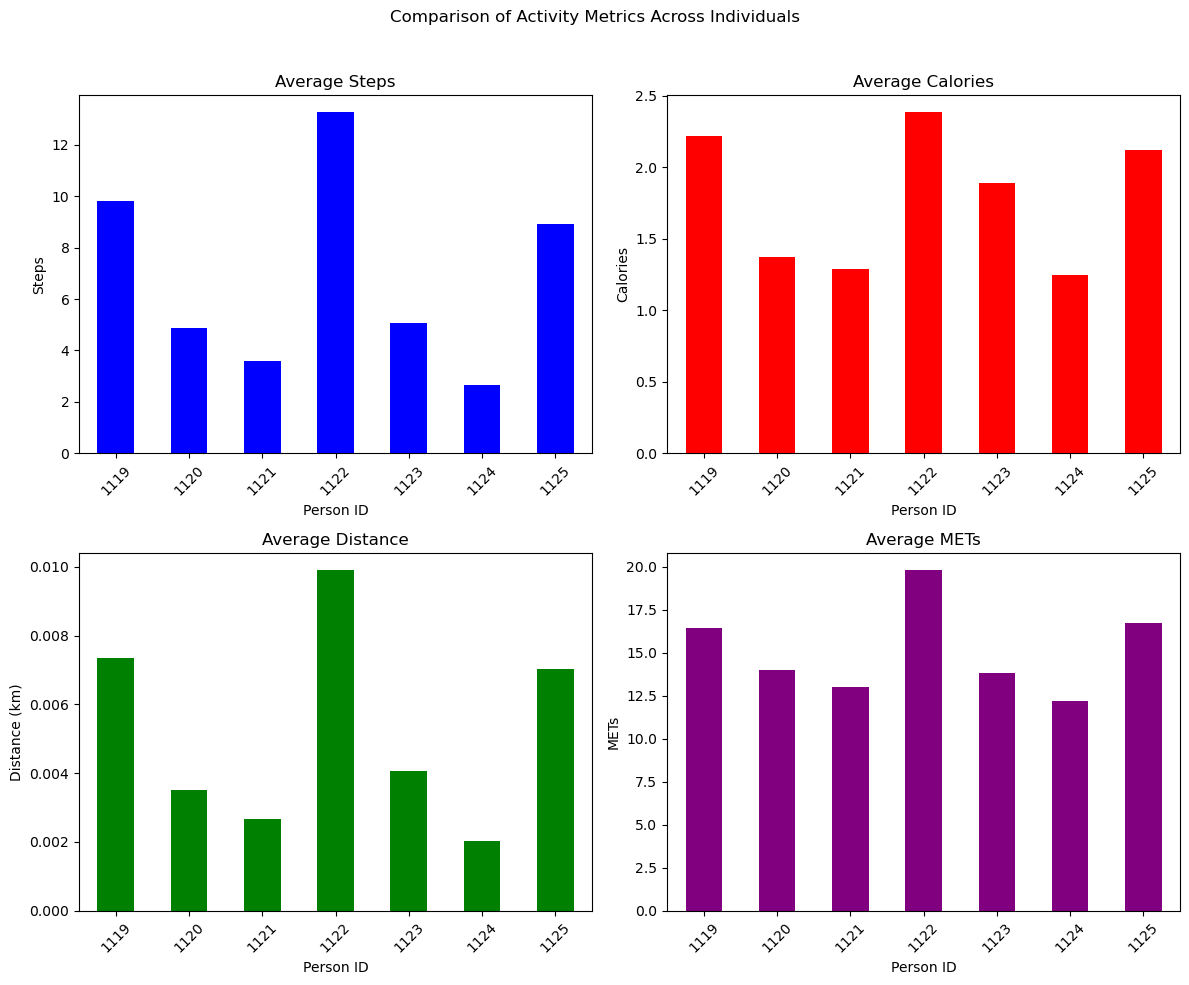

In [ ]:
plot_group_comparison(data)